In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
dfc = pd.read_csv(r"C:\Users\Usuario\Desktop\HackatonABInBev\reto-colombia-2020-main\data\Input1_clientes_estructura.csv",
                 delimiter=';', header=0)
dfv = pd.read_csv(r"C:\Users\Usuario\Desktop\HackatonABInBev\reto-colombia-2020-main\data\Input2_clientes_venta.csv",
                 delimiter=';', header=0)
dfo = pd.read_csv(r"C:\Users\Usuario\Desktop\HackatonABInBev\reto-colombia-2020-main\data\Input3_clientes_test.csv",
                 delimiter=';', header=0)

In [3]:
dfco = pd.merge(dfc, dfo, on="Cliente")

In [4]:
dfc.drop(["Regional2"], axis = 1, inplace =True)

In [5]:
dfv.loc[(dfv["Marca2"] == "Marca_20")&(dfv["Cupo2"] == "Cupo_3") & (dfv["CapacidadEnvase2"] == "CapacidadEnvase_9"), "Marca" ] = 1
dfv.loc[(dfv["Marca2"] == "Marca_16")&(dfv["Cupo2"] == "Cupo_2") & (dfv["CapacidadEnvase2"] == "CapacidadEnvase_10"), "Marca"] = 2
dfv.loc[(dfv["Marca2"] == "Marca_9") &(dfv["Cupo2"] == "Cupo_3") & (dfv["CapacidadEnvase2"] == "CapacidadEnvase_12"), "Marca"] = 3
dfv.loc[(dfv["Marca2"] == "Marca_38")&(dfv["Cupo2"] == "Cupo_2") & (dfv["CapacidadEnvase2"] == "CapacidadEnvase_10"), "Marca"] = 4
dfv.loc[(dfv["Marca2"] == "Marca_39")&(dfv["Cupo2"] == "Cupo_2") & (dfv["CapacidadEnvase2"] == "CapacidadEnvase_10"), "Marca"] = 5

dfv.sample(5)

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Marca
850057,2020,7,12740,SegmentoPrecio_1,Marca_5,Cupo_1,CapacidadEnvase_10,0.069550,-33.374006,660.710523,NaN
1389289,2020,8,15178,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,5.0
1318828,2020,7,13924,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.369485,0.000000,2573.567966,NaN
852000,2020,7,12799,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_17,0.028540,0.000000,144.565813,NaN
1123285,2019,8,630,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_14,0.037383,0.000000,276.907133,NaN


In [6]:
df = pd.merge(dfv, dfo, on="Cliente")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961315 entries, 0 to 961314
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Año               961315 non-null  int64  
 1   Mes               961315 non-null  int64  
 2   Cliente           961315 non-null  int64  
 3   SegmentoPrecio2   961315 non-null  object 
 4   Marca2_x          961315 non-null  object 
 5   Cupo2             961315 non-null  object 
 6   CapacidadEnvase2  961315 non-null  object 
 7   Volumen           961315 non-null  float64
 8   disc              961315 non-null  float64
 9   nr                961315 non-null  float64
 10  Marca             68613 non-null   float64
 11  Marca1            0 non-null       float64
 12  Marca2_y          0 non-null       float64
 13  Marca3            0 non-null       float64
 14  Marca_Inno1       0 non-null       float64
 15  Marca_Inno2       0 non-null       float64
dtypes: float64(9), int64

In [7]:
df["Marca1"]      = df.Marca.apply(lambda x: 1.0 if x==1 else 0.0)
df["Marca2_y"]    = df.Marca.apply(lambda x: 1.0 if x==2 else 0.0)
df["Marca3"] =      df.Marca.apply(lambda x: 1.0 if x==3 else 0.0)
df["Marca_Inno1"] = df.Marca.apply(lambda x: 1.0 if x==4 else 0.0)
df["Marca_Inno2"] = df.Marca.apply(lambda x: 1.0 if x==5 else 0.0)

df.sample(5)

,Año,Mes,Cliente,SegmentoPrecio2,Marca2_x,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Marca,Marca1,Marca2_y,Marca3,Marca_Inno1,Marca_Inno2
739035,2020,8,10199,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_10,0.086938,-6.160170,712.785777,NaN,0.0,0.0,0.0,0.0,0.0
523499,2020,1,4282,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_10,0.665073,-233.055709,5201.287047,NaN,0.0,0.0,0.0,0.0,0.0
324859,2020,8,14545,SegmentoPrecio_1,Marca_5,Cupo_2,CapacidadEnvase_17,0.085620,0.000000,434.561617,NaN,0.0,0.0,0.0,0.0,0.0
700475,2019,7,9084,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_10,0.152141,-1113.482167,119.035557,NaN,0.0,0.0,0.0,0.0,0.0
476689,2020,1,3649,SegmentoPrecio_1,Marca_5,Cupo_2,CapacidadEnvase_16,0.026345,-3.746246,165.171268,NaN,0.0,0.0,0.0,0.0,0.0


In [8]:
df1 = pd.merge(dfc, df, on="Cliente")
print(df1.Cliente.nunique())
df1.sample(5)

9302


,Cliente,Gerencia2,SubCanal2,Categoria,Nevera,Año,Mes,SegmentoPrecio2,Marca2_x,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Marca,Marca1,Marca2_y,Marca3,Marca_Inno1,Marca_Inno2
508220,8484,Gerencia_10,Subcanal_1,Categoria_1,1,2020,7,SegmentoPrecio_2,Marca_12,Cupo_1,CapacidadEnvase_10,0.008694,0.000000,93.327242,NaN,0.0,0.0,0.0,0.0,0.0
712380,12122,Gerencia_10,Subcanal_3,Categoria_2,0,2019,6,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_10,0.282547,-241.272968,2032.710247,NaN,0.0,0.0,0.0,0.0,0.0
21713,549,Gerencia_4,Subcanal_1,Categoria_3,0,2020,5,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_10,0.065203,0.000000,528.107498,NaN,0.0,0.0,0.0,0.0,0.0
8282,246,Gerencia_6,Subcanal_3,Categoria_2,1,2019,7,SegmentoPrecio_2,Marca_6,Cupo_1,CapacidadEnvase_10,0.017388,0.000000,173.878589,NaN,0.0,0.0,0.0,0.0,0.0
719395,12263,Gerencia_8,Subcanal_3,Categoria_2,0,2020,5,SegmentoPrecio_1,Marca_5,Cupo_2,CapacidadEnvase_10,0.065203,-114.147471,505.994424,NaN,0.0,0.0,0.0,0.0,0.0


In [9]:
mes2 = lambda row: row.Mes+12 if row.Año == 2020 else row.Mes
df1["Mes2"] = df1.apply(mes2,axis=1)

In [11]:
CV = df1.groupby('Cliente').Volumen.sum()
CV.head()

Cliente
1     0.895458
2     3.707907
3     0.682460
4     6.368080
5    11.838257
Name: Volumen, dtype: float64

In [10]:
df1.Marca.fillna(0,inplace = True)
df1.sample(3)

,Cliente,Gerencia2,SubCanal2,Categoria,Nevera,Año,Mes,SegmentoPrecio2,Marca2_x,Cupo2,...,Volumen,disc,nr,Marca,Marca1,Marca2_y,Marca3,Marca_Inno1,Marca_Inno2,Mes2
841431,14464,Gerencia_10,Subcanal_1,Categoria_1,1,2019,9,SegmentoPrecio_1,Marca_2,Cupo_4,...,0.021076,0.000000,146.828511,0.0,0.0,0.0,0.0,0.0,0.0,9
616236,10428,Gerencia_9,Subcanal_8,Categoria_2,0,2020,9,SegmentoPrecio_3,Marca_9,Cupo_3,...,0.011065,0.000000,204.130687,0.0,0.0,0.0,0.0,0.0,0.0,21
775009,13268,Gerencia_10,Subcanal_1,Categoria_3,1,2020,1,SegmentoPrecio_2,Marca_12,Cupo_2,...,0.065203,-67.552231,581.581383,0.0,0.0,0.0,0.0,0.0,0.0,13


In [11]:
df1.drop(['Año','Mes'],axis=1,inplace=True)

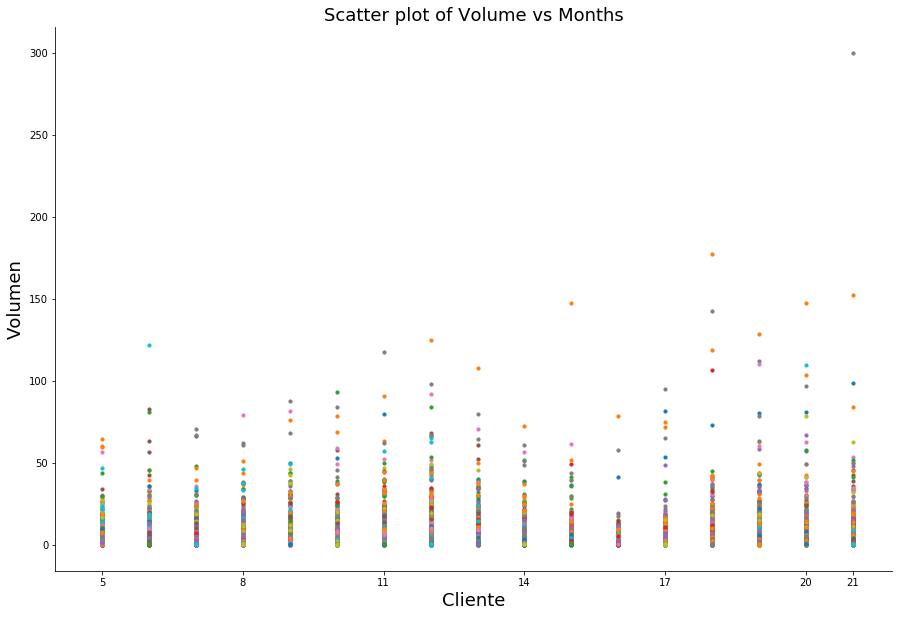

In [66]:
#1. Scatter plot Useful for: # Visualize the relationship between data.

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1,1,1)
# iterate over each category and plot the data. This way, every group has it's own color. Otherwise everything would be blue
for cat in sorted(list(df1["Cliente"].unique())):
    # filter x and the y for each category
    mes = df1[df1["Cliente"] == cat]["Mes2"]
    vol = df1[df1["Cliente"] == cat]["Volumen"]
    # plot the data
    ax.scatter(mes, vol, label=cat, s=10)
# prettify the plot
# eliminate 2/4 spines (lines that make the box/axes) to make it more pleasant
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")
# set a specific label for each axis
ax.set_xlabel("Cliente",fontsize = 18)
ax.set_ylabel("Volumen",fontsize = 18)
# change the lower limit of the plot, this will allow us to see the legend on the left
ax.set_xlim(4)
ax.set_title("Scatter plot of Volume vs Months",fontsize = 18)
ax.set_xticks([5,8,11,14,17,20,21])
#ax.set_xtickslabels(['Marzo','Agosto','Noviembre','Febrero','Mayo','Agosto','Septiembre'],rotation=30)
#ax.legend(loc = "upper left", fontsize = 12)
plt.show()

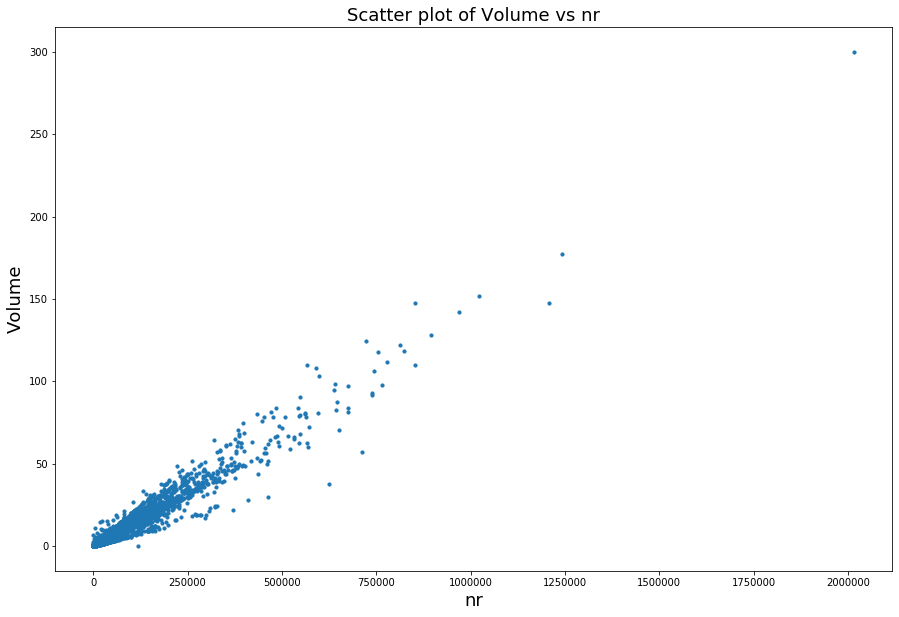

In [14]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(1,1,1)
ax.scatter(df1.nr,df1.Volumen , s=10)
ax.set_xlabel("nr",fontsize = 18)
ax.set_ylabel("Volume",fontsize = 18)
ax.set_title("Scatter plot of Volume vs nr",fontsize = 18)
plt.show()

In [ ]:
import seaborn as sns

CV = df1.Volumen
data = pd.concat((CV,df1.nr),axis=1)

g = sns.lmplot(x="nr", y="Volumen", data=data)

In [ ]:
from sklearn.linear_model import LinearRegression
X = df1[['nr']]

y = df1.Volumen

# Can we do linear regression on this?
line_fitter = LinearRegression()

line_fitter.fit(X, y)

predict = line_fitter.predict(X)

predict

In [12]:
print(df1.shape)
df2 = df1[(df1.Marca >=1) & (df1.Marca <=5)] 
df2.shape

(961315, 19)


(68613, 19)

In [13]:
df1 = df2.copy()

In [14]:
# find categorical variables

categorical = [var for var in df1.columns if df1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['Gerencia2', 'SubCanal2', 'Categoria', 'SegmentoPrecio2', 'Marca2_x', 'Cupo2', 'CapacidadEnvase2']


In [15]:
df1[categorical].head()

,Gerencia2,SubCanal2,Categoria,SegmentoPrecio2,Marca2_x,Cupo2,CapacidadEnvase2
8,Gerencia_1,Subcanal_1,Categoria_1,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10
9,Gerencia_1,Subcanal_1,Categoria_1,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10
10,Gerencia_1,Subcanal_1,Categoria_1,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10
11,Gerencia_1,Subcanal_1,Categoria_1,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10
20,Gerencia_1,Subcanal_1,Categoria_1,SegmentoPrecio_1,Marca_20,Cupo_3,CapacidadEnvase_9


In [16]:
# find numerical variables

numerical = [var for var in df1.columns if df1[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 12 numerical variables

The numerical variables are : ['Cliente', 'Nevera', 'Volumen', 'disc', 'nr', 'Marca', 'Marca1', 'Marca2_y', 'Marca3', 'Marca_Inno1', 'Marca_Inno2', 'Mes2']


In [27]:
X = (df1[['Cliente', 'Nevera', 'Volumen', 'disc', 'nr','Marca2_y', 'Marca3', 'Marca_Inno1', 'Marca_Inno2',
          'Mes2','Gerencia2', 'SubCanal2', 'Categoria', 'SegmentoPrecio2', 'Marca2_x', 'Cupo2', 'CapacidadEnvase2']])
y = df1['Marca1']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [31]:
X_train.shape, X_test.shape

((48029, 17), (20584, 17))

In [32]:
X_train.dtypes

Cliente               int64
Nevera                int64
Volumen             float64
disc                float64
nr                  float64
Marca2_y            float64
Marca3              float64
Marca_Inno1         float64
Marca_Inno2         float64
Mes2                  int64
Gerencia2            object
SubCanal2            object
Categoria            object
SegmentoPrecio2      object
Marca2_x             object
Cupo2                object
CapacidadEnvase2     object
dtype: object

In [33]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Gerencia2',
 'SubCanal2',
 'Categoria',
 'SegmentoPrecio2',
 'Marca2_x',
 'Cupo2',
 'CapacidadEnvase2']

In [34]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Cliente',
 'Nevera',
 'Volumen',
 'disc',
 'nr',
 'Marca2_y',
 'Marca3',
 'Marca_Inno1',
 'Marca_Inno2',
 'Mes2']

In [35]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Gerencia2           0.0
SubCanal2           0.0
Categoria           0.0
SegmentoPrecio2     0.0
Marca2_x            0.0
Cupo2               0.0
CapacidadEnvase2    0.0
dtype: float64

In [36]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [1]:
pip install --upgrade category_encoders

  Using cached category_encoders-2.2.2-py2.py3-none-any.whl (80 kB)



In [37]:
# import category encoders

import category_encoders as ce

In [52]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['Gerencia2',
                                 'SubCanal2',
                                 'Categoria',
                                 'SegmentoPrecio2',
                                 'Marca2_x',
                                 'Cupo2',
                                 'CapacidadEnvase2'
                                ])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [53]:
X_train.head()

,Cliente,Nevera,Volumen,disc,nr,Marca2_y,Marca3,Marca_Inno1,Marca_Inno2,Mes2,...,Marca2_x_1,Marca2_x_2,Marca2_x_3,Marca2_x_4,Marca2_x_5,Cupo2_1,Cupo2_2,CapacidadEnvase2_1,CapacidadEnvase2_2,CapacidadEnvase2_3
577792,9714,0,0.009352,0.000000,165.516011,0.0,1.0,0.0,0.0,19,...,1,0,0,0,0,1,0,1,0,0
125883,2449,1,0.018705,0.000000,331.031968,0.0,1.0,0.0,0.0,20,...,1,0,0,0,0,1,0,1,0,0
774530,13259,1,0.042086,0.000000,744.821941,0.0,1.0,0.0,0.0,18,...,1,0,0,0,0,1,0,1,0,0
340129,5646,1,0.130933,-549.321941,1676.854406,0.0,1.0,0.0,0.0,11,...,1,0,0,0,0,1,0,1,0,0
367144,6075,0,0.023381,0.000000,413.789973,0.0,1.0,0.0,0.0,14,...,1,0,0,0,0,1,0,1,0,0


In [54]:
X_train.shape

(48029, 65)

In [55]:
X_test.shape

(20584, 65)

In [56]:
#Feature Scaling
cols = X_train.columns

In [57]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [58]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [59]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [60]:
X_train.head()

,Cliente,Nevera,Volumen,disc,nr,Marca2_y,Marca3,Marca_Inno1,Marca_Inno2,Mes2,...,Marca2_x_1,Marca2_x_2,Marca2_x_3,Marca2_x_4,Marca2_x_5,Cupo2_1,Cupo2_2,CapacidadEnvase2_1,CapacidadEnvase2_2,CapacidadEnvase2_3
0,0.168268,-1.0,-0.500000,0.000000,-0.260913,0.0,0.0,0.0,0.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.704300,0.0,-0.333333,0.000000,-0.036740,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.594043,0.0,0.083333,0.000000,0.523693,0.0,0.0,0.0,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.320322,0.0,1.666667,-24.395452,1.786029,0.0,0.0,0.0,0.0,-0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.268797,-1.0,-0.250000,0.000000,0.075347,0.0,0.0,0.0,0.0,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cliente,Nevera,Volumen,disc,nr,Marca2_y,Marca3,Marca_Inno1,Marca_Inno2,Mes2,Gerencia2,SubCanal2,Categoria,SegmentoPrecio2,Marca2_x,Cupo2,CapacidadEnvase2
577792,9714,0,0.009352,0.000000,165.516011,0.0,1.0,0.0,0.0,19,Gerencia_10,Subcanal_3,Categoria_2,SegmentoPrecio_3,Marca_9,Cupo_3,CapacidadEnvase_12
125883,2449,1,0.018705,0.000000,331.031968,0.0,1.0,0.0,0.0,20,Gerencia_9,Subcanal_1,Categoria_1,SegmentoPrecio_3,Marca_9,Cupo_3,CapacidadEnvase_12
774530,13259,1,0.042086,0.000000,744.821941,0.0,1.0,0.0,0.0,18,Gerencia_9,Subcanal_8,Categoria_2,SegmentoPrecio_3,Marca_9,Cupo_3,CapacidadEnvase_12
340129,5646,1,0.130933,-549.321941,1676.854406,0.0,1.0,0.0,0.0,11,Gerencia_3,Subcanal_2,Categoria_3,SegmentoPrecio_3,Marca_9,Cupo_3,CapacidadEnvase_12
367144,6075,0,0.023381,0.000000,413.789973,0.0,1.0,0.0,0.0,14,Gerencia_3,Subcanal_8,Categoria_4,SegmentoPrecio_3,Marca_9,Cupo_3,CapacidadEnvase_12


In [61]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state = 0, max_depth = 11)
classifier.fit(X_train, X_test)
print(classifier.score(y_train, y_test))
print(classifier.tree_.max_depth)

ValueError: Unknown label type: 'continuous-multioutput'

In [63]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 2000, random_state = 0)
classifier.fit(X_train, X_test)
print(classifier.score(y_train, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [48029, 20584]

In [ ]:
#Model training
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

In [91]:
y_pred = gnb.predict(X_test)

y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [92]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 1.0000


In [93]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([0., 0., 0., ..., 0., 0., 1.])

In [94]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [95]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [96]:
# check class distribution in test set

y_test.value_counts()

0.0000    19383
1.0000     1201
Name: Marca1, dtype: int64

In [97]:
# check null accuracy score

null_accuracy = (19383/(19383+1201))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9417


In [98]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[19383     0]
 [    0  1201]]

True Positives(TP) =  19383

True Negatives(TN) =  1201

False Positives(FP) =  0

False Negatives(FN) =  0


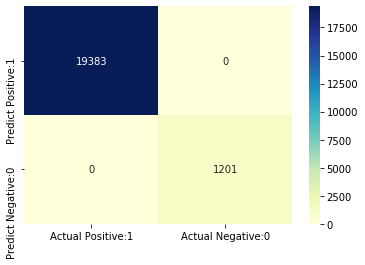

In [99]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [100]:
# print the first 10 predicted probabilities of two classes- 0 and 1
pd.options.display.float_format = '{:.4f}'.format
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [101]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob No Comprar', 'Prob Comprar'])

y_pred_prob_df

,Prob No Comprar,Prob Comprar
0,1.0000,0.0000
1,1.0000,0.0000
2,1.0000,0.0000
3,1.0000,0.0000
4,1.0000,0.0000
5,1.0000,0.0000
6,1.0000,0.0000
7,1.0000,0.0000
8,0.0000,1.0000
9,1.0000,0.0000


In [102]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [103]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

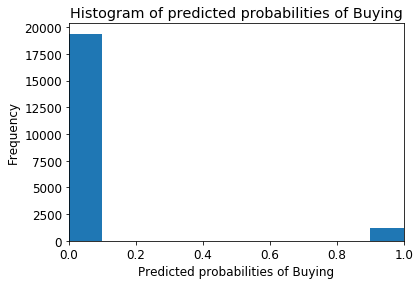

In [104]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Buying')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Buying')
plt.ylabel('Frequency')